In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_data = train.flow_from_directory('./forest_fire/Training and Validation/',
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

test_data = test.flow_from_directory('./forest_fire/Testing/',
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_data.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
r = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
58/58 [==============================] - 21s 340ms/step - loss: 0.3297 - accuracy: 0.8745 - val_loss: 0.4036 - val_accuracy: 0.8088
Epoch 2/10
58/58 [==============================] - 19s 334ms/step - loss: 0.1475 - accuracy: 0.9536 - val_loss: 0.6760 - val_accuracy: 0.8088
Epoch 3/10
58/58 [==============================] - 19s 332ms/step - loss: 0.1395 - accuracy: 0.9552 - val_loss: 0.3306 - val_accuracy: 0.8824
Epoch 4/10
58/58 [==============================] - 20s 343ms/step - loss: 0.1237 - accuracy: 0.9634 - val_loss: 0.2758 - val_accuracy: 0.9265
Epoch 5/10
58/58 [==============================] - 19s 327ms/step - loss: 0.1158 - accuracy: 0.9623 - val_loss: 0.2929 - val_accuracy: 0.8529
Epoch 6/10
58/58 [==============================] - 20s 350ms/step - loss: 0.0916 - accuracy: 0.9716 - val_loss: 0.2636 - val_accuracy: 0.8971
Epoch 7/10
58/58 [==============================] - 21s 361ms/step - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.1298 - val_accuracy: 0.9412

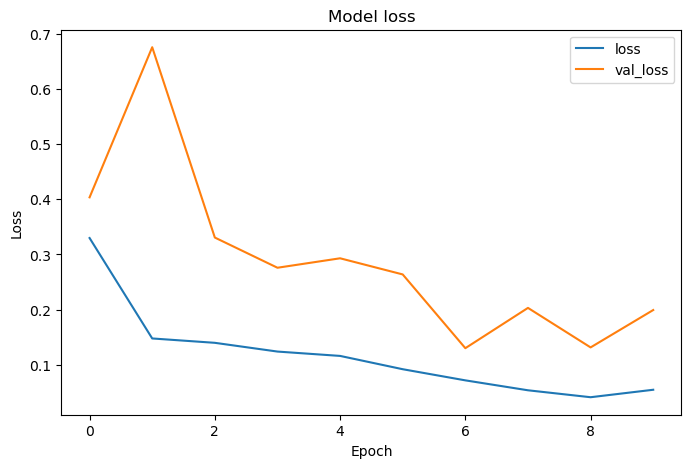

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('./images/ideal-model.png');

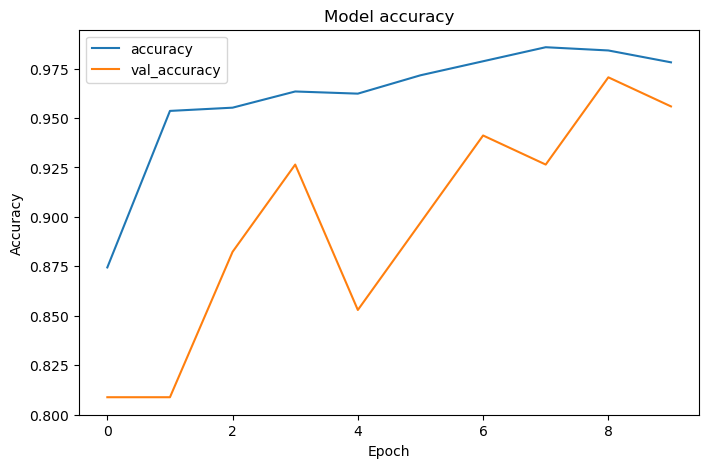

In [8]:
plt.figure(figsize=(8, 5))
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.savefig('./images/ideal-model-acc');

In [9]:
def predict_image(file_name):
    img = image.load_img(file_name, target_size=(150, 150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    print(val)
    
    if val:
        plt.xlabel("No fire", fontsize=30)
    else:
        plt.xlabel("Fire", fontsize=30)

1/1 [==============================] - 0s 116ms/step
[[0.]]


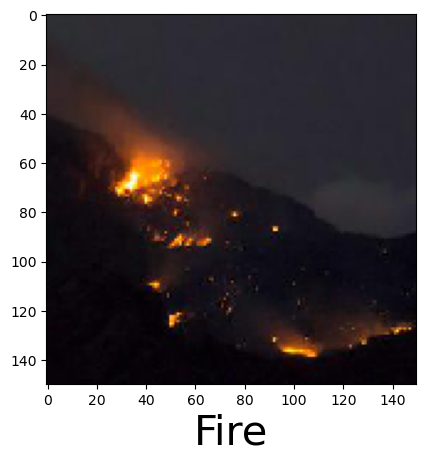

In [10]:
predict_image(f'./forest_fire/Testing/fire/abc{np.random.randint(low=169, high=191)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


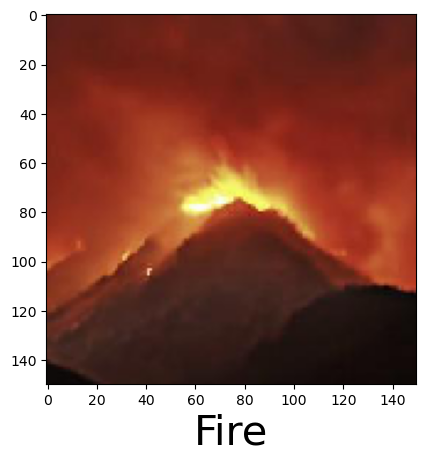

In [11]:
predict_image(f'./forest_fire/Testing/fire/abc{np.random.randint(low=169, high=191)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


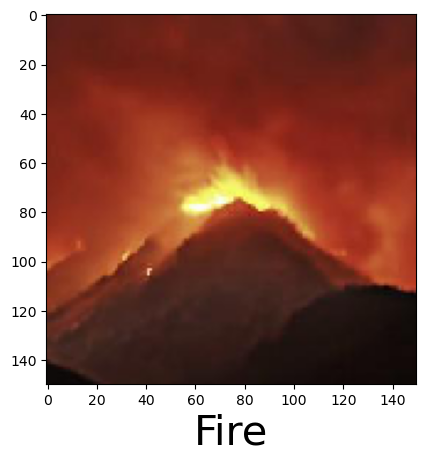

In [12]:
predict_image(f'./forest_fire/Testing/fire/abc{np.random.randint(low=169, high=191)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


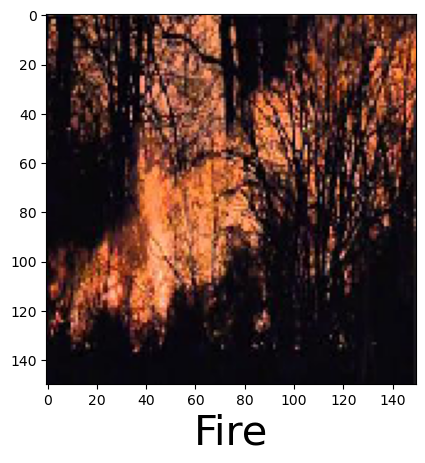

In [13]:
predict_image(f'./forest_fire/Testing/fire/abc{np.random.randint(low=169, high=191)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[1.]]


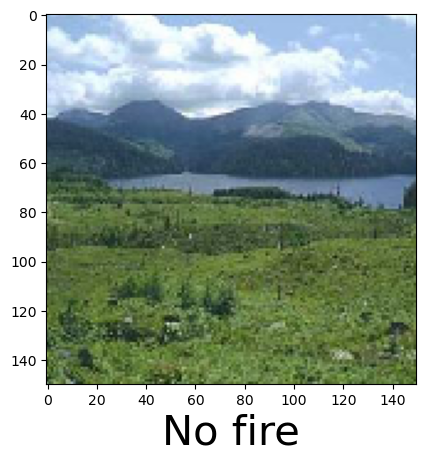

In [14]:
predict_image(f'./forest_fire/Testing/nofire/abc{np.random.randint(low=335, high=381)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[1.]]


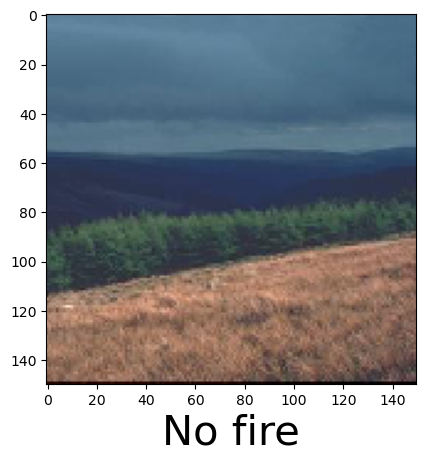

In [15]:
predict_image(f'./forest_fire/Testing/nofire/abc{np.random.randint(low=335, high=381)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[1.]]


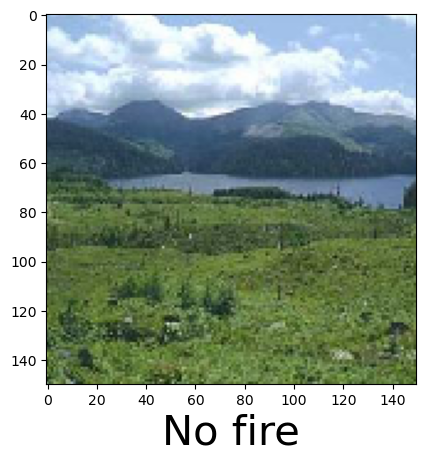

In [16]:
predict_image(f'./forest_fire/Testing/nofire/abc{np.random.randint(low=335, high=381)}.jpg')

1/1 [==============================] - 0s 16ms/step
[[1.]]


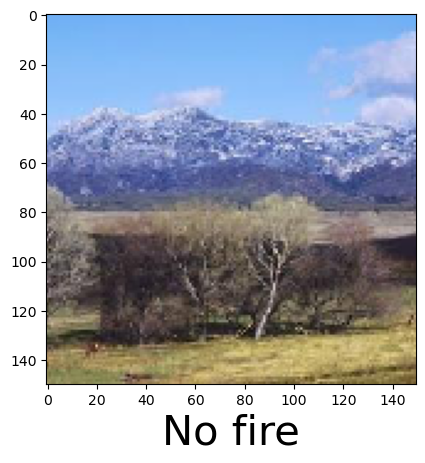

In [17]:
predict_image(f'./forest_fire/Testing/nofire/abc{np.random.randint(low=335, high=381)}.jpg')